In [2]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from time import gmtime, strftime
from sklearn.decomposition import PCA

In [3]:
my_path = str(os.getcwd())
X_train = np.load(my_path+'/.data/X_train_surge_new.npz')
Y_train = pd.read_csv(my_path+'/.data/Y_train_surge.csv')
X_test = np.load(my_path+'/.data/X_test_surge_new.npz')

In [4]:
print(X_train.files)
t_slp = X_train['t_slp']
t_surge1_input = X_train['t_surge1_input']
t_surge2_input = X_train['t_surge2_input']
t_surge1_output = X_train['t_surge1_output']
t_surge2_output = X_train['t_surge2_output']
slp = X_train['slp']
    

['id_sequence', 't_slp', 'slp', 't_surge1_input', 'surge1_input', 't_surge2_input', 'surge2_input', 't_surge1_output', 't_surge2_output']


In [5]:
print(slp.shape)
print(t_slp.shape)
print(t_surge1_input.shape)

print(40*41*41+10*4+40)

(5599, 40, 41, 41)
(5599, 40)
(5599, 10)
67320


In [6]:
idx = 16
print([strftime("%a, %d %b %Y %H:%M:%S",gmtime(int(t))) for t in t_slp[idx]])
print([strftime("%a, %d %b %Y %H:%M:%S",gmtime(int(t))) for t in t_surge1_input[idx]])
print([strftime("%a, %d %b %Y %H:%M:%S",gmtime(int(t))) for t in t_surge1_output[idx]])
print([strftime("%a, %d %b %Y %H:%M:%S",gmtime(int(t))) for t in t_surge2_input[idx]])
print([strftime("%a, %d %b %Y %H:%M:%S",gmtime(int(t))) for t in t_surge2_output[idx]])

['Tue, 07 Feb 1950 03:00:16', 'Tue, 07 Feb 1950 06:00:32', 'Tue, 07 Feb 1950 08:59:44', 'Tue, 07 Feb 1950 12:00:00', 'Tue, 07 Feb 1950 15:00:16', 'Tue, 07 Feb 1950 17:59:28', 'Tue, 07 Feb 1950 20:59:44', 'Wed, 08 Feb 1950 00:00:00', 'Wed, 08 Feb 1950 03:00:16', 'Wed, 08 Feb 1950 06:00:32', 'Wed, 08 Feb 1950 08:59:44', 'Wed, 08 Feb 1950 12:00:00', 'Wed, 08 Feb 1950 15:00:16', 'Wed, 08 Feb 1950 17:59:28', 'Wed, 08 Feb 1950 20:59:44', 'Thu, 09 Feb 1950 00:00:00', 'Thu, 09 Feb 1950 03:00:16', 'Thu, 09 Feb 1950 06:00:32', 'Thu, 09 Feb 1950 08:59:44', 'Thu, 09 Feb 1950 12:00:00', 'Thu, 09 Feb 1950 15:00:16', 'Thu, 09 Feb 1950 17:59:28', 'Thu, 09 Feb 1950 20:59:44', 'Fri, 10 Feb 1950 00:00:00', 'Fri, 10 Feb 1950 03:00:16', 'Fri, 10 Feb 1950 06:00:32', 'Fri, 10 Feb 1950 08:59:44', 'Fri, 10 Feb 1950 12:00:00', 'Fri, 10 Feb 1950 15:00:16', 'Fri, 10 Feb 1950 17:59:28', 'Fri, 10 Feb 1950 20:59:44', 'Sat, 11 Feb 1950 00:00:00', 'Sat, 11 Feb 1950 03:00:16', 'Sat, 11 Feb 1950 06:00:32', 'Sat, 11 Feb 

In [7]:
times = []
for i in range(5599):
    time = np.concatenate((t_slp[i],t_surge1_input[i],t_surge1_output[i],t_surge2_input[i],t_surge2_output[i]))
    time = time-np.mean(time)
    times.append(time)
print(np.shape(times))
times = np.array(times)
print(times[0])

(5599, 80)
[-301632. -290816. -280000. -269184. -258432. -247616. -236800. -226048.
 -215232. -204416. -193600. -182784. -172032. -161216. -150400. -139648.
 -128832. -118016. -107200.  -96384.  -85632.  -74816.  -64000.  -53248.
  -42432.  -31616.  -20800.   -9984.     768.   11584.   22400.   33152.
   43968.   54784.   65600.   76416.   87168.   97984.  108800.  119552.
 -334016. -290816. -244032. -200832. -153984. -110848.  -67584.  -24448.
   22400.   65600.  112384.  155584.  198784.  241984.  288768.  331968.
  375168.  422016.  465152.  508416. -326784. -283648. -240384. -193600.
 -150400. -107200.  -60416.  -17216.   25984.   72768.  115968.  159168.
  205952.  249216.  292352.  339200.  382400.  425600.  472384.  515584.]


In [8]:
slpf = []
m = np.mean(slp)
#slp = slp - np.mean(slp)
for i in range(5599):
    slpf.append(slp[i].flatten())

slpf = np.array(slpf)
print(slpf.shape)
print(slpf[0][:100])

(5599, 67240)
[102389.25 102458.25 102514.25 102554.25 102581.25 102593.25 102594.25
 102584.25 102561.25 102527.25 102483.25 102430.25 102366.25 102294.25
 102216.25 102131.25 102040.25 101945.25 101841.25 101735.25 101636.25
 101563.25 101554.25 101552.25 101552.25 101558.25 101559.25 101550.25
 101512.25 101462.25 101419.25 101376.25 101342.25 101319.25 101305.25
 101297.25 101287.25 101281.25 101276.25 101275.25 101271.25 102432.25
 102509.25 102572.25 102620.25 102651.25 102668.25 102671.25 102662.25
 102641.25 102607.25 102563.25 102510.25 102446.25 102372.25 102293.25
 102206.25 102113.25 102016.25 101917.25 101815.25 101703.25 101700.25
 101812.25 101784.25 101665.25 101620.25 101601.25 101600.25 101548.25
 101494.25 101445.25 101385.25 101331.25 101302.25 101287.25 101274.25
 101267.25 101266.25 101268.25 101266.25 101268.25 102467.25 102552.25
 102624.25 102680.25 102717.25 102738.25 102745.25 102739.25 102719.25
 102686.25 102641.25 102586.25 102523.25 102452.25 102371.25 10

In [9]:
nb_comp = 1000
pca = PCA(n_components=nb_comp)
pca.fit(slpf)

PCA(n_components=1000)

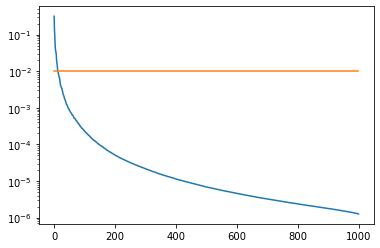

In [10]:
fig1,ax1 = plt.subplots()
ax1.plot(pca.explained_variance_ratio_)
plt.yscale("log")
ax1.plot([0.01 for _ in range(nb_comp)])